In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder # para realizar el Label Encoding 
from sklearn.preprocessing import OneHotEncoder  # para realizar el One-Hot Encoding
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

## OBJETIVO:

- Hacer una códificación de la/s variables categóricas que tengáis en vuestro set de datos.
- Recordad que lo primero que deberéis hacer es decidir su vuestras variables tienen o no orden, para que en función de esto uséis una aproximación u otra.
- Guardad el dataframe, donde deberíais tener las variables estadandarizas, normalizadas y codificadas en un csv para usarlo en el próximo pairprogramming

In [3]:
df = pd.read_pickle('../datos/possum_normalizado.pkl')

In [5]:
df.head(2)

,age,hdlngth,skullw,taill,footlgth,earconch,eye,chest,belly,hdlngth_esta,case,site,Pop,sex,totlngth
0,2.193141,0.420996,1.134883,-0.517732,1.381091,1.557431,0.147177,0.491222,1.241874,0.420996,1,1,Vic,m,89.0
1,1.140433,-0.028932,0.231197,-0.261331,0.923835,0.750501,0.912499,0.736833,0.150424,-0.028932,2,1,Vic,f,91.5


### Variables categóricas: site, Pop y sex. 
- Nominales: sex, Pop
- Ordinales: site

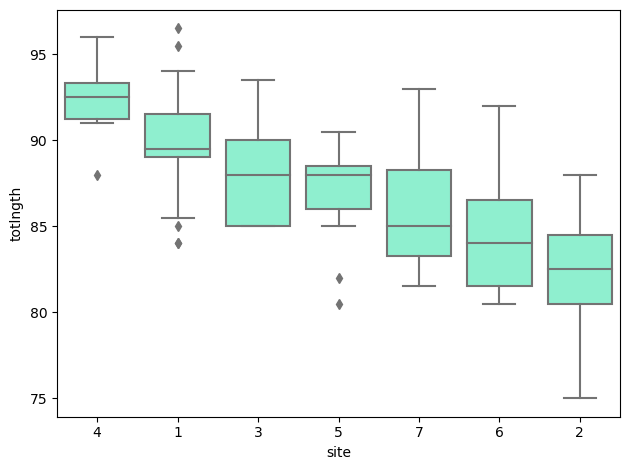

In [50]:
# Graficamos nuestra variable site para evaluar si es ordinal o nominal

plt.figure()


sns.boxplot(x = df['site'], data = df, y = df['totlngth'], color = "aquamarine", order=[4,1,3,5,7,6,2]); # para trazar una línea de densidad


plt.tight_layout()

plt.show() 

Como la variable 'site' parece tener distinto peso sobre nuestra variable respuesta dependiendo de sus categorías, hemos decidido codificarla tanto como ordinal como nominal. Al obtener nuestros modelos más adelante podremos observar con que tipo de codificación nuestro modelo ajusta mejor. 

### ENCODING con One-Hot Encoding

In [29]:
# vamos a definir una función que nos aplique este método

def one_hot_encoder_one(df,columna,nombre_col, keep_first=True):
    
    # iniciamos el método de OneHot Encoder
    oh = OneHotEncoder()
    
    # hacemos la codificación de los datos para la variable dada 
    transformados = oh.fit_transform(df[[columna]])
    
    # convertimos nuestro array con la codificación hecha en un dataframe
    oh_df = pd.DataFrame(transformados.toarray())
    
    # el método get_feature_names nos va a dar el nombre de las columnas nuevas que se nos generarán
    oh_df.columns = oh.get_feature_names(input_features=nombre_col)
    
    # concatenamos el dataframe original con el dataframe que acabamos de crear
    final = pd.concat([df,oh_df],axis=1)
    
    # eliminamos la columna original 
   
    return final

In [38]:
sex_encode = one_hot_encoder_one(df, 'sex', nombre_col='s', keep_first=True)

In [39]:
sex_encode

,age,hdlngth,skullw,taill,footlgth,earconch,eye,chest,belly,hdlngth_esta,case,site,Pop,sex,totlngth,s_f,s_m
0,2.193141,0.420996,1.134883,-0.517732,1.381091,1.557431,0.147177,0.491222,1.241874,0.420996,1,1,Vic,m,89.0,0.0,1.0
1,1.140433,-0.028932,0.231197,-0.261331,0.923835,0.750501,0.912499,0.736833,0.150424,-0.028932,2,1,Vic,f,91.5,1.0,0.0
2,1.140433,0.392875,1.005785,1.020671,1.586856,0.921668,0.434173,1.473667,0.514241,0.392875,3,1,Vic,f,95.5,1.0,0.0
3,1.140433,0.167912,0.069825,0.507870,1.746896,0.995025,0.147177,0.491222,0.514241,0.167912,4,1,Vic,f,92.0,1.0,0.0
4,-0.964982,-0.310136,-0.188371,-0.517732,0.580893,1.239549,0.051512,0.736833,0.150424,-0.310136,5,1,Vic,f,85.5,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,-1.491336,-0.872546,-0.285195,-0.261331,-0.562247,-0.325405,-0.235484,-1.964889,-2.032475,-0.872546,100,7,other,m,81.5,0.0,1.0
100,-1.491336,-1.125630,-0.704763,1.020671,-0.928052,-0.031976,-1.000805,-0.982445,0.150424,-1.125630,101,7,other,m,82.5,0.0,1.0
101,1.140433,-0.057052,-0.607940,0.507870,-1.133817,-0.667739,-1.957457,-0.982445,-0.941025,-0.057052,102,7,other,f,89.0,1.0,0.0
102,0.087726,-0.310136,-0.543391,-0.261331,-1.270994,-0.545477,0.338508,-0.982445,-1.304842,-0.310136,103,7,other,m,82.5,0.0,1.0


In [40]:
pop_encode = one_hot_encoder_one(sex_encode, 'Pop', nombre_col='p', keep_first=True)

In [41]:
pop_encode

,age,hdlngth,skullw,taill,footlgth,earconch,eye,chest,belly,hdlngth_esta,case,site,Pop,sex,totlngth,s_f,s_m,p_Vic,p_other
0,2.193141,0.420996,1.134883,-0.517732,1.381091,1.557431,0.147177,0.491222,1.241874,0.420996,1,1,Vic,m,89.0,0.0,1.0,1.0,0.0
1,1.140433,-0.028932,0.231197,-0.261331,0.923835,0.750501,0.912499,0.736833,0.150424,-0.028932,2,1,Vic,f,91.5,1.0,0.0,1.0,0.0
2,1.140433,0.392875,1.005785,1.020671,1.586856,0.921668,0.434173,1.473667,0.514241,0.392875,3,1,Vic,f,95.5,1.0,0.0,1.0,0.0
3,1.140433,0.167912,0.069825,0.507870,1.746896,0.995025,0.147177,0.491222,0.514241,0.167912,4,1,Vic,f,92.0,1.0,0.0,1.0,0.0
4,-0.964982,-0.310136,-0.188371,-0.517732,0.580893,1.239549,0.051512,0.736833,0.150424,-0.310136,5,1,Vic,f,85.5,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,-1.491336,-0.872546,-0.285195,-0.261331,-0.562247,-0.325405,-0.235484,-1.964889,-2.032475,-0.872546,100,7,other,m,81.5,0.0,1.0,0.0,1.0
100,-1.491336,-1.125630,-0.704763,1.020671,-0.928052,-0.031976,-1.000805,-0.982445,0.150424,-1.125630,101,7,other,m,82.5,0.0,1.0,0.0,1.0
101,1.140433,-0.057052,-0.607940,0.507870,-1.133817,-0.667739,-1.957457,-0.982445,-0.941025,-0.057052,102,7,other,f,89.0,1.0,0.0,0.0,1.0
102,0.087726,-0.310136,-0.543391,-0.261331,-1.270994,-0.545477,0.338508,-0.982445,-1.304842,-0.310136,103,7,other,m,82.5,0.0,1.0,0.0,1.0


### ENCONDING con get_dummies

In [46]:
dummies = pd.get_dummies(df["sex"], prefix_sep = "_", prefix = "sex", dtype = int)
dummies.head(2)

,sex_f,sex_m
0,0,1
1,1,0


In [47]:
df_dummies = pd.concat([df, dummies], axis = 1)
df_dummies.head(2)

,age,hdlngth,skullw,taill,footlgth,earconch,eye,chest,belly,hdlngth_esta,case,site,Pop,sex,totlngth,sex_f,sex_m
0,2.193141,0.420996,1.134883,-0.517732,1.381091,1.557431,0.147177,0.491222,1.241874,0.420996,1,1,Vic,m,89.0,0,1
1,1.140433,-0.028932,0.231197,-0.261331,0.923835,0.750501,0.912499,0.736833,0.150424,-0.028932,2,1,Vic,f,91.5,1,0


In [48]:
dummies1 = pd.get_dummies(df["Pop"], prefix_sep = "_", prefix = "Pop", dtype = int)
dummies1.head(2)

,Pop_Vic,Pop_other
0,1,0
1,1,0


In [49]:
df_dummies_1 = pd.concat([df_dummies, dummies1], axis = 1)
df_dummies_1.head(2)

,age,hdlngth,skullw,taill,footlgth,earconch,eye,chest,belly,hdlngth_esta,case,site,Pop,sex,totlngth,sex_f,sex_m,Pop_Vic,Pop_other
0,2.193141,0.420996,1.134883,-0.517732,1.381091,1.557431,0.147177,0.491222,1.241874,0.420996,1,1,Vic,m,89.0,0,1,1,0
1,1.140433,-0.028932,0.231197,-0.261331,0.923835,0.750501,0.912499,0.736833,0.150424,-0.028932,2,1,Vic,f,91.5,1,0,1,0


In [ ]:
df_encod.to_pickle('../datos/possum_normalizado_encod.pkl')